In [1]:
%load_ext autoreload
%autoreload 2

import sys
# currently not installable so import from parent dir
sys.path.append('..')
from fluxdataqaqc.data import Data
from fluxdataqaqc.qaqc import QaQc 

## create a ``Data`` object to read in time series data using a config file

In [2]:
config_path = 'fluxnet_config.ini'
d = Data(config_path)

In [3]:
# you can access all metadata and datain the config file as a list
d.config.items('METADATA')

[('climate_file_path', 'woodward_1.csv'),
 ('station_latitude', '36.4267'),
 ('station_longitude', '-99.42'),
 ('station_elevation', '611'),
 ('anemometer_height', '3'),
 ('missing_data_value', '-9999')]

In [4]:
# or as a dict, e.g. to access specific values by name
dict(d.config.items('METADATA'))['station_elevation']

'611'

In [5]:
# path to climate time series input and config files
print(d.climate_file, '\n', d.config_file)

/home/john/flux-data-qaqc/example_data/woodward_1.csv 
 /home/john/flux-data-qaqc/example_data/fluxnet_config.ini


In [6]:
# view header of input time series file
d.header

array(['TIMESTAMP', 'TA_F', 'TA_F_QC', 'SW_IN_POT', 'SW_IN_F',
       'SW_IN_F_QC', 'LW_IN_F', 'LW_IN_F_QC', 'VPD_F', 'VPD_F_QC', 'PA_F',
       'PA_F_QC', 'P_F', 'P_F_QC', 'WS_F', 'WS_F_QC', 'USTAR', 'USTAR_QC',
       'NETRAD', 'NETRAD_QC', 'PPFD_IN', 'PPFD_IN_QC', 'PPFD_OUT',
       'PPFD_OUT_QC', 'SW_OUT', 'SW_OUT_QC', 'LW_OUT', 'LW_OUT_QC',
       'CO2_F_MDS', 'CO2_F_MDS_QC', 'TS_F_MDS_1', 'TS_F_MDS_1_QC',
       'SWC_F_MDS_1', 'SWC_F_MDS_1_QC', 'G_F_MDS', 'G_F_MDS_QC',
       'LE_F_MDS', 'LE_F_MDS_QC', 'LE_CORR', 'LE_CORR_25', 'LE_CORR_75',
       'LE_RANDUNC', 'H_F_MDS', 'H_F_MDS_QC', 'H_CORR', 'H_CORR_25',
       'H_CORR_75', 'H_RANDUNC', 'NEE_VUT_REF', 'NEE_VUT_REF_QC',
       'NEE_VUT_REF_RANDUNC', 'NEE_VUT_25', 'NEE_VUT_50', 'NEE_VUT_75',
       'NEE_VUT_25_QC', 'NEE_VUT_50_QC', 'NEE_VUT_75_QC',
       'RECO_NT_VUT_REF', 'RECO_NT_VUT_25', 'RECO_NT_VUT_50',
       'RECO_NT_VUT_75', 'GPP_NT_VUT_REF', 'GPP_NT_VUT_25',
       'GPP_NT_VUT_50', 'GPP_NT_VUT_75', 'RECO_DT_VUT_REF',


# load date-indexed DataFrame using ``.df``

In [7]:
d.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,Rn,sw_out,lw_out,G,LE,LE_corr,H,H_corr
date,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,NaN,67.1459,43.8414,20.3876,13.3116
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,NaN,92.8616,60.9673,32.6505,21.4364
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,NaN,75.8029,50.3151,20.0569,13.3130
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,NaN,67.1459,45.0539,20.3876,13.6798
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,NaN,92.8616,62.6443,32.6505,22.0260


## you can modify the dataframe or assign new columns or even assign a new dataframe

In [8]:
x = d.df
x += 100
d.df = x
d.df *= 5
d.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,Rn,sw_out,lw_out,G,LE,LE_corr,H,H_corr
date,,,,,,,,,,,,,,,
2009-01-01,514.015,1433.550,1115.540,1806.510,509.595,500.0,515.715,NaN,NaN,NaN,NaN,835.7295,719.2070,601.9380,566.558
2009-01-02,512.590,1436.645,1109.210,1844.730,504.960,500.0,510.465,NaN,NaN,NaN,NaN,964.3080,804.8365,663.2525,607.182
2009-01-03,527.590,1440.040,1121.205,1840.020,513.975,500.0,522.015,NaN,NaN,NaN,NaN,879.0145,751.5755,600.2845,566.565
2009-01-04,481.235,1443.710,1068.965,1733.375,504.460,500.0,521.680,NaN,NaN,NaN,NaN,835.7295,725.2695,601.9380,568.399
2009-01-05,488.930,1447.670,1121.660,1722.390,506.520,500.0,512.085,NaN,NaN,NaN,NaN,964.3080,813.2215,663.2525,610.130


---
# using the `QaQc` class to correct energy balance closure

In [9]:
from fluxdataqaqc.qaqc import QaQc 

In [10]:
# read in data fresh and use it to create a QaQc instance
data = Data(config_path)
q = QaQc(data)

In [11]:
# data is not corrected yet:
q.corrected

False

In [12]:
# data has not changed...
q.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,Rn,sw_out,lw_out,G,LE,LE_corr,H,H_corr
date,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,NaN,67.1459,43.8414,20.3876,13.3116
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,NaN,92.8616,60.9673,32.6505,21.4364
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,NaN,75.8029,50.3151,20.0569,13.3130
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,NaN,67.1459,45.0539,20.3876,13.6798
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,NaN,92.8616,62.6443,32.6505,22.0260


In [13]:
# note the original columns
import pprint
pprint.pprint(', '.join(q.df.columns))

('t_avg, sw_pot, sw_in, lw_in, vpd, ppt, ws, Rn, sw_out, lw_out, G, LE, '
 'LE_corr, H, H_corr')


# correct energy balance using `flux-data-qaqc` methods

In [14]:
q.correct_data()
q.corrected

/home/john/anaconda3/envs/gridwxcomp/lib/python3.7/site-packages/refet/calcs.py:380: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(-np.tan(lat) * np.tan(delta))


True

In [15]:
# now we have original data plus adjusted variables, energy balance ratios, and others
pprint.pprint(', '.join(q.df.columns))

('t_avg, sw_pot, sw_in, lw_in, vpd, ppt, ws, Rn, sw_out, lw_out, G, LE, '
 'LE_corr, H, H_corr, energy, flux, bowen_ratio, LE_adj, H_adj, flux_adj, '
 'flux_corr, et_reg, et_adj, et_corr, ebc_reg, ebc_adj, ebc_corr, rso')


In [16]:
q.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,Rn,sw_out,lw_out,...,H_adj,flux_adj,flux_corr,et_reg,et_adj,et_corr,ebc_reg,ebc_adj,ebc_corr,rso
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,...,20.3876,87.5335,57.1530,2.320562,2.320562,1.515159,NaN,NaN,NaN,NaN
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,...,32.6505,125.5121,82.4037,3.209297,3.209297,2.107030,NaN,NaN,NaN,NaN
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,...,20.0569,95.8598,63.6281,2.619748,2.619748,1.738890,NaN,NaN,NaN,NaN
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,...,20.3876,87.5335,58.7337,2.320562,2.320562,1.557063,NaN,NaN,NaN,NaN
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,...,32.6505,125.5121,84.6703,3.209297,3.209297,2.164987,NaN,NaN,NaN,NaN


## temporally aggregate to monthly data using sums for ET and P, and means for all others

In [17]:
q.monthly_df

,flux,rso,LE_corr,H_adj,flux_corr,H_corr,lw_in,vpd,lw_out,sw_out,...,H,ebc_reg,sw_pot,LE,ebc_corr,ws,et_reg,et_adj,et_corr,ppt
month,,,,,,,,,,,,,,,,,,,,,
2009-01-31,102.470565,NaN,57.066065,24.236697,74.692668,17.626603,261.216323,1.959129,NaN,NaN,...,24.236697,NaN,203.904032,78.233868,NaN,3.534355,NaN,NaN,NaN,NaN
2009-02-28,103.773596,241.162010,62.864507,24.660911,82.272961,19.408454,274.406607,3.757714,NaN,NaN,...,24.660911,NaN,262.857250,79.112686,NaN,3.828571,NaN,NaN,NaN,NaN
2009-03-31,102.739155,121.135661,60.914145,24.226029,79.708248,18.794103,305.189258,6.457871,NaN,NaN,...,24.226029,NaN,341.041290,78.513126,NaN,4.358710,NaN,NaN,NaN,NaN
2009-04-30,103.674777,29.935993,62.844563,24.612837,82.409700,19.565137,323.534467,4.942533,438.996567,39.416091,...,24.612837,NaN,414.747833,79.061940,NaN,4.482000,NaN,NaN,NaN,NaN
2009-05-31,131.125547,1.734261,84.779639,26.615866,106.351555,21.571916,358.490258,6.900710,425.218290,43.397006,...,26.615866,NaN,464.501226,104.509681,NaN,3.529613,NaN,NaN,NaN,NaN
2009-06-30,134.016061,NaN,78.151917,42.451295,110.773440,32.621523,394.172633,14.179367,474.711296,52.937561,...,39.610437,1.178637,484.656267,94.405623,0.974224,3.977200,NaN,NaN,NaN,NaN
2009-07-31,133.068961,NaN,56.809781,64.734991,110.791984,53.982203,404.057839,17.672806,494.093058,56.279016,...,64.538939,1.192587,474.238484,68.530023,0.992937,3.553065,NaN,NaN,NaN,NaN
2009-08-31,127.650368,14.019095,50.293303,70.460562,109.903996,59.610693,395.732581,13.237258,484.429164,51.035447,...,70.169445,1.169106,434.118548,57.480923,1.006573,3.860452,NaN,NaN,NaN,NaN
2009-09-30,84.210013,82.734162,24.259965,55.975056,71.073665,46.813700,369.301200,7.141900,444.053318,36.670526,...,55.615563,1.244944,369.851700,28.594450,1.050739,3.036133,NaN,NaN,NaN,NaN


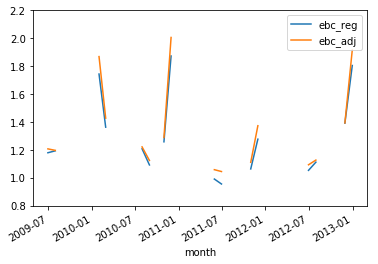

In [18]:
%matplotlib inline
# compate monthly energy balance correction ratio with raw data and corrected
q.monthly_df[['ebc_reg','ebc_adj']].plot(legend=True)